In [10]:
import sys
import os
sys.path.append('/home/yutanagano/Projects/tcr_embedder')
os.chdir('/home/yutanagano/Projects/tcr_embedder')

In [11]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn

seaborn.set_theme()
seaborn.set_style('white')

In [12]:
BENCHMARKING_PARENT_DIR = Path('benchmarks')

In [13]:
metric_dicts = [
    {
        'model_name': 'random_guess',
        '5nn_accuracy': 1/48
    }
]

for model in BENCHMARKING_PARENT_DIR.iterdir():
    with open(model/'metrics.json', 'r') as f:
        metric_dicts.append(json.load(f))

In [14]:
metrics = pd.DataFrame(metric_dicts)
metrics = metrics.sort_values(by='5nn_accuracy', ignore_index=True)

In [15]:
metrics

,model_name,5nn_accuracy,alignment,uniformity,alignment + uniformity
0,random_guess,0.020833,NaN,NaN,NaN
1,random_embedder_1,0.070625,0.188695,-0.218463,-0.029768
2,random_embedder_3,0.071250,0.116590,-0.150309,-0.033719
3,random_embedder_2,0.071458,0.126440,-0.166346,-0.039906
4,random_embedder_4,0.073125,0.209874,-0.253276,-0.043402
5,random_embedder_0,0.075417,0.133281,-0.168128,-0.034847
6,atchley_embedder,0.122083,0.972870,-0.980380,-0.007510
7,cdr3_levenshtein,0.230000,NaN,NaN,NaN
8,CDR3BERT_c_6_128_8_512-embed_5,0.237917,0.605934,-0.698529,-0.092595
9,CDR3BERT_cp_6_128_8_512-embed_5,0.286875,0.753471,-0.805676,-0.052205


In [16]:

def collapse_names(name):
    groups = (
        'AutoContrastive_SimCL',
        'CDR3BERT_cp',
        'CDR3BERT_c',
        'random_embedder'
    )

    for group in groups:
        if group in name:
            return group
    
    return name

metrics['model_name'] = metrics['model_name'].map(collapse_names)

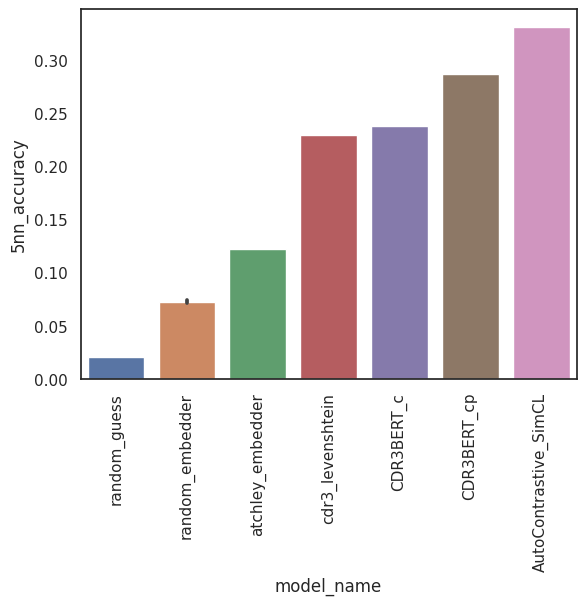

In [17]:
knn_acc_plot = seaborn.barplot(metrics, x='model_name', y='5nn_accuracy')
knn_acc_plot.set_xticklabels(knn_acc_plot.get_xticklabels(), rotation=90)
plt.show()

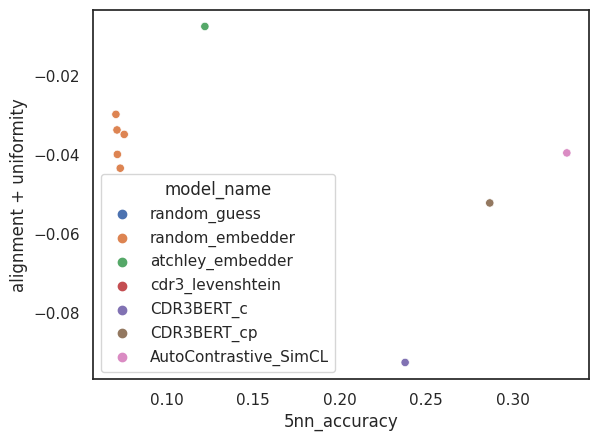

In [18]:
scatter_model_names = seaborn.scatterplot(metrics, x='5nn_accuracy', y='alignment + uniformity', hue='model_name')
plt.show()